In [47]:
import numpy as np 
import pandas as pd
import sklearn

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [49]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
import pickle

In [53]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from scipy import stats as st
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PowerTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [54]:
df=pd.read_csv("data/measurements.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [56]:
df1=pd.read_excel("data/measurements2.xlsx")
df1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [57]:
df.shape

(388, 12)

In [58]:
df1.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [60]:
df1.columns=df1.columns.str.replace(" ", "_")
df1=df1.rename(columns=str.lower)
df1.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [61]:
df1.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [62]:
df1.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [63]:
df1.rain.unique()

array([0, 1], dtype=int64)

In [64]:
df1.sun.unique()

array([0, 1], dtype=int64)

In [65]:
df1.ac.unique()

array([0, 1], dtype=int64)

In [66]:
data=df1.copy()

In [67]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [68]:
data = data.apply(lambda x: x.replace("ac", "AC"))

In [69]:
data = data.apply(lambda x: x.replace("sun ac", "AC sun"))
data = data.apply(lambda x: x.replace("AC Sun", "AC sun"))
data = data.apply(lambda x: x.replace("ac rain", "AC rain"))

In [70]:
data.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC                     14
AC rain                10
AC sun                  5
snow                    3
AC snow                 1
half rain half sun      1
Name: specials, dtype: int64

In [71]:
((data.isna().sum())/len(data))*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

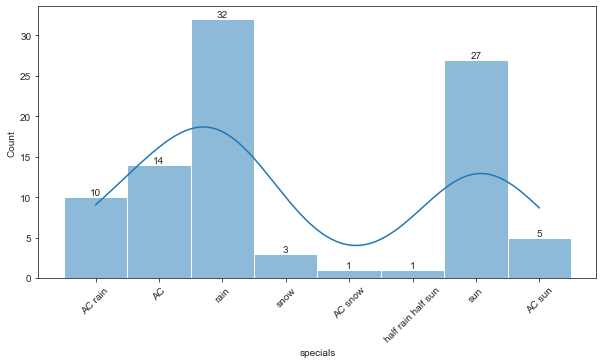

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data[data['specials'].notna()]['specials'],kde=True) 
sns.histplot(ax=ax, xticks_rotation=45)
plt.xticks(rotation=45)
for container in ax.containers: 
    ax.bar_label(container,fontsize=10);
plt.show();

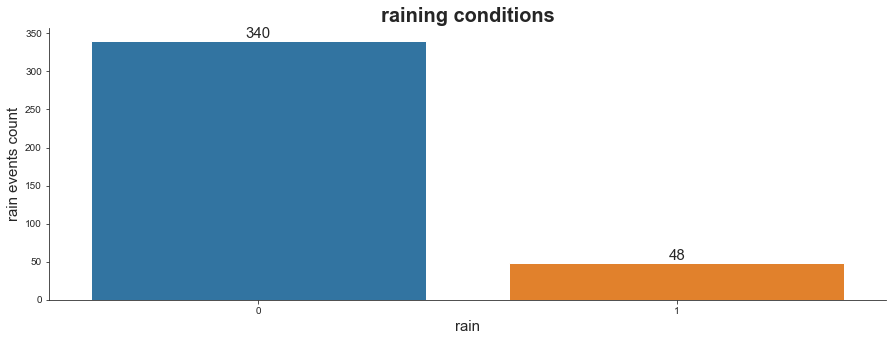

In [73]:
plt.figure(figsize = (15,5))
ax=sns.countplot(x='rain',data=data)
plt.title("raining conditions",fontsize=20, fontweight="bold")
plt.xlabel('rain', fontsize=15)
plt.ylabel("rain events count", fontsize=15)
sns.despine()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.set_style("ticks")


for container in ax.containers: 
    ax.bar_label(container,fontsize=15);

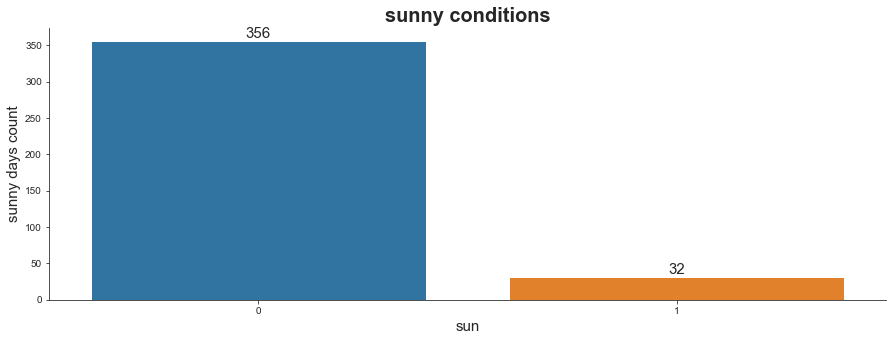

In [74]:
plt.figure(figsize = (15,5))
ax=sns.countplot(x='sun',data=data)
plt.title("sunny conditions",fontsize=20, fontweight="bold")
plt.xlabel('sun', fontsize=15)
plt.ylabel("sunny days count", fontsize=15)
sns.despine()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.set_style("ticks")


for container in ax.containers: 
    ax.bar_label(container,fontsize=15);

In [75]:
data.specials = list(map(lambda x,y: 'sun' if x == np.nan and y == 1 else ('rain' if x== np.nan and y == 0 else x), data.specials, data.ac))

In [76]:
data.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC                     14
AC rain                10
AC sun                  5
snow                    3
AC snow                 1
half rain half sun      1
Name: specials, dtype: int64

In [77]:
check=data[data.specials.isna()]

In [78]:
check[check['rain']==1]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
61,2.1,12.2,23,21.5,9,NaN,SP98,1,1,0,NaN,NaN


In [79]:
check[check['sun']==1]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas


In [80]:
check[check['ac']==1]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
61,2.1,12.2,23,21.5,9,NaN,SP98,1,1,0,NaN,NaN


In [81]:
#na_in_specials_indexes = list(data[data['specials'].isna()==True].index)

Data is not accurate. from the count graphs above, sunny counts are almost as many as the rain counts in 1 year

and the conditions don't reflect the on specials. so we can cannot use rain, ac. or sun columns to fill up the nans in specials as show from the 3 lines of code above. given the time the nans will be filled with the mode although it is a far from the truth. 

In [82]:
imputer_it=IterativeImputer()
data['temp_inside']=imputer_it.fit_transform(data[['temp_inside']])

In [83]:
data.corr()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill_liters
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.132852
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.100868
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.049673
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,0.034128
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.084867
ac,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,NaN
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.494501
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,NaN
refill_liters,0.132852,0.100868,0.049673,0.034128,-0.084867,NaN,-0.494501,NaN,1.000000


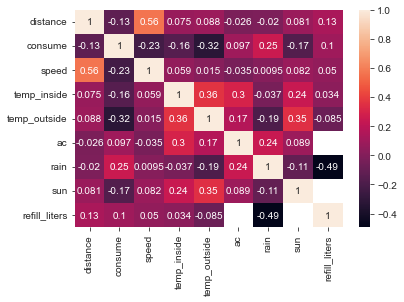

In [84]:
sns.heatmap(data.corr(), annot=True)
plt.show()

no real blocks of mulitcollinearity. 

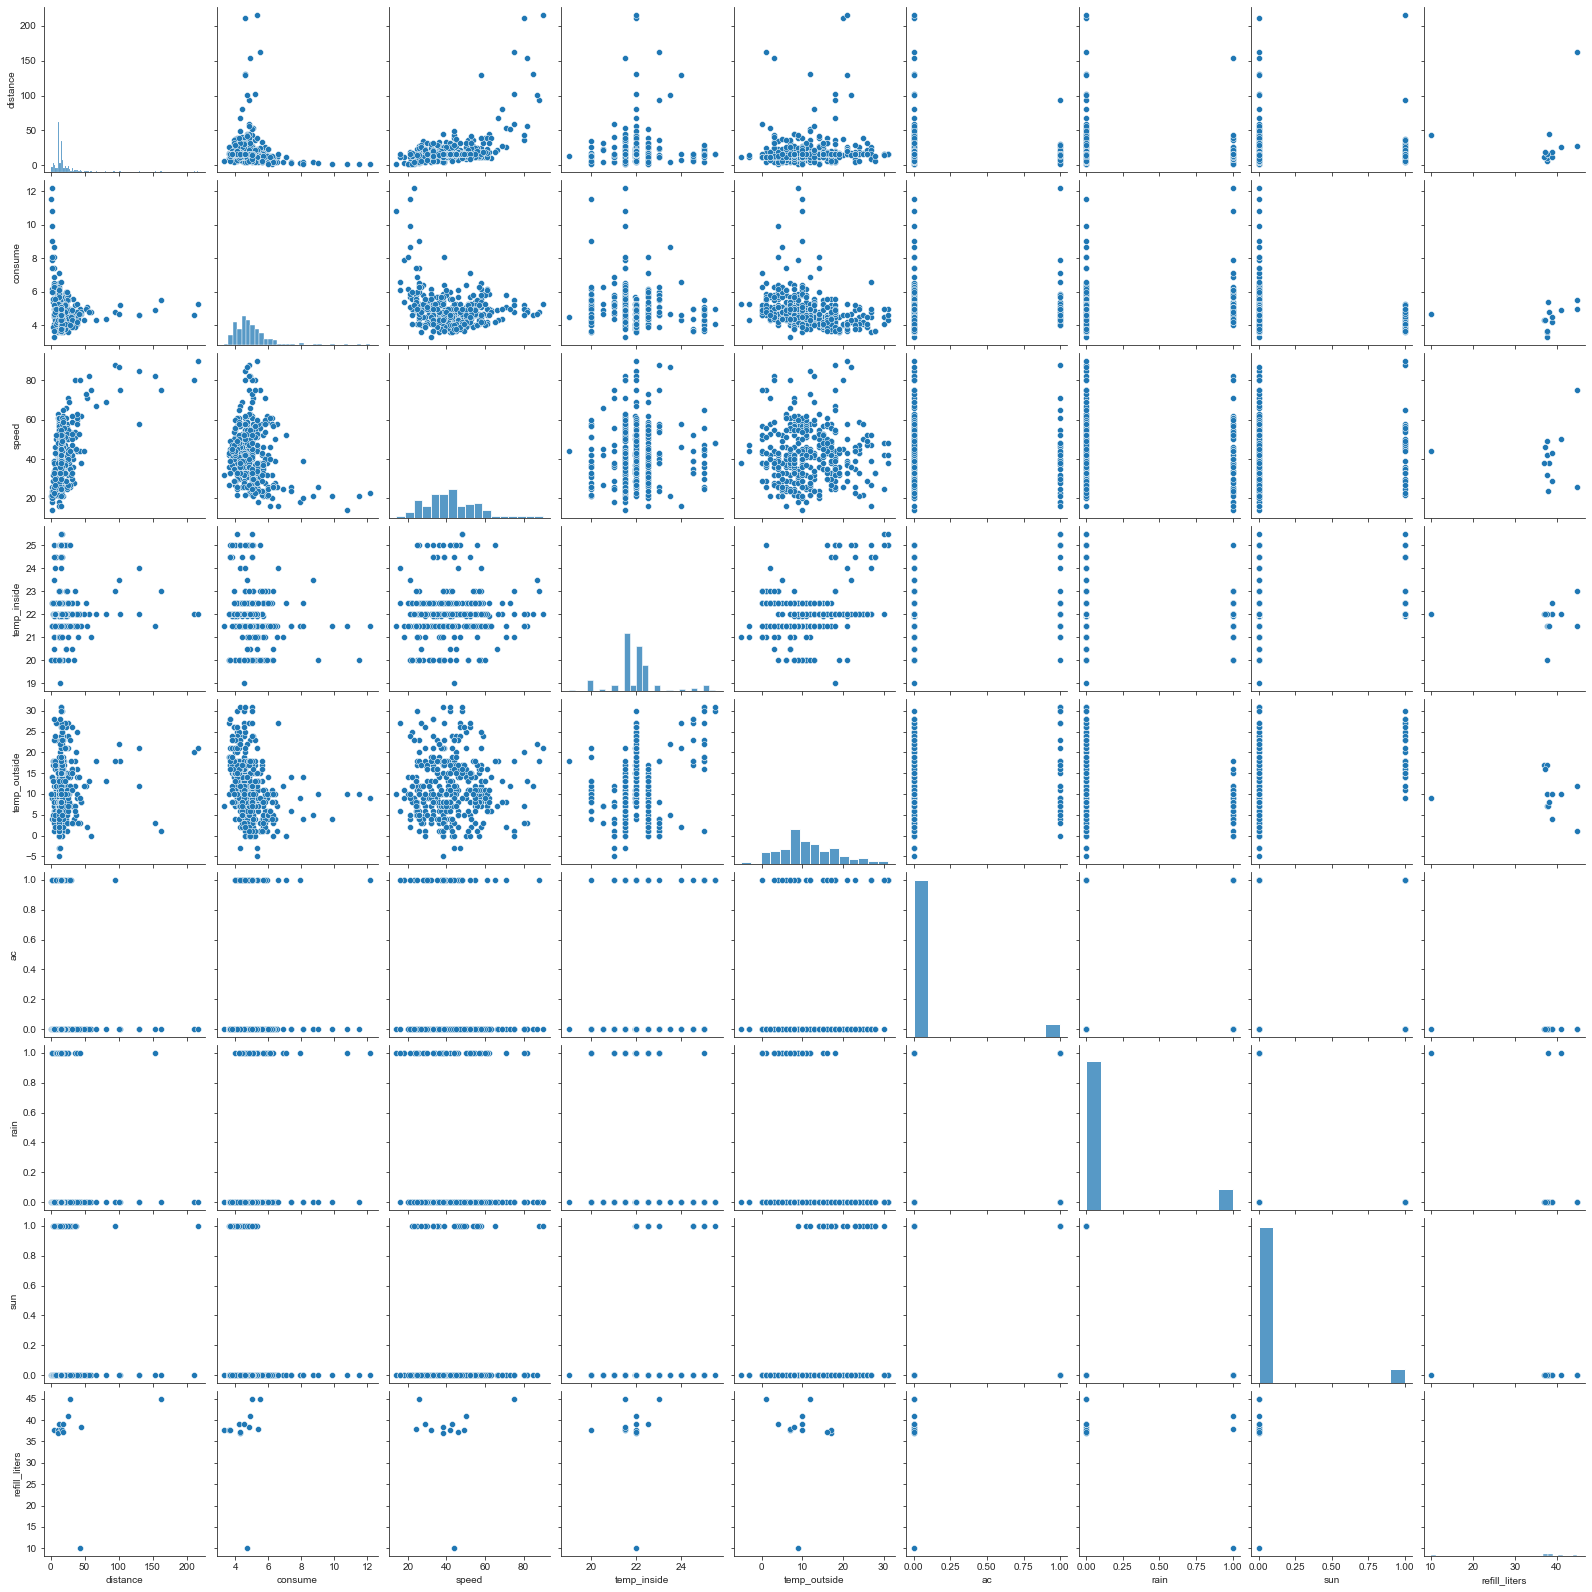

In [85]:
sns.pairplot(data)
plt.show()

In [86]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [87]:
data['gas_type'].value_counts(dropna=False)

SP98    228
E10     160
Name: gas_type, dtype: int64

Actually because the data in specials is either captured in the other 3 columns (rain, sun ,ac) and the data in refill_gas is caupted in gas type and refill_liters in redundant given we have consumption data and all the aforementioned columns have  high high % of null values as shown above, all of these columns are dropped. 


In [88]:
data1=data.drop(columns=['refill_gas','refill_liters','specials'])

In [89]:
data1.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

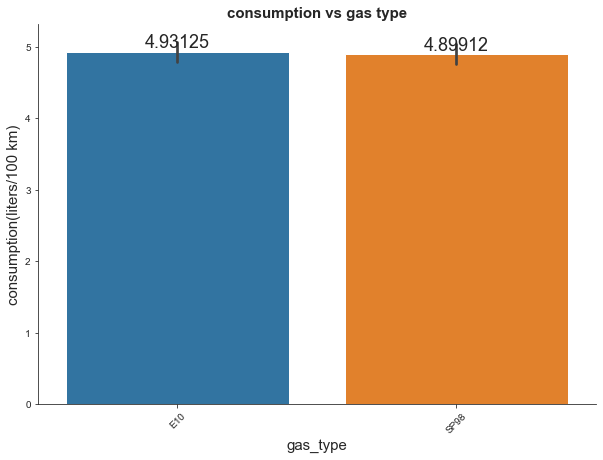

In [90]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='gas_type', y='consume',data=data1)
plt.title('consumption vs gas type',fontsize=15, fontweight="bold")
plt.xlabel('gas_type', fontsize=15)
plt.ylabel("consumption(liters/100 km)", fontsize=15)
sns.despine()

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(rotation=45)
#sns.set_style("ticks")
#plt.legend(prop={'size': 18}, loc=2) # legend position

# code for label values. 
for container in ax.containers: 
    ax.bar_label(container,fontsize=18)
plt.show();

this is not withtanading weather coditions. switched to sp98 in winter and then e10 in spring ( ac uses more fuel than heating)

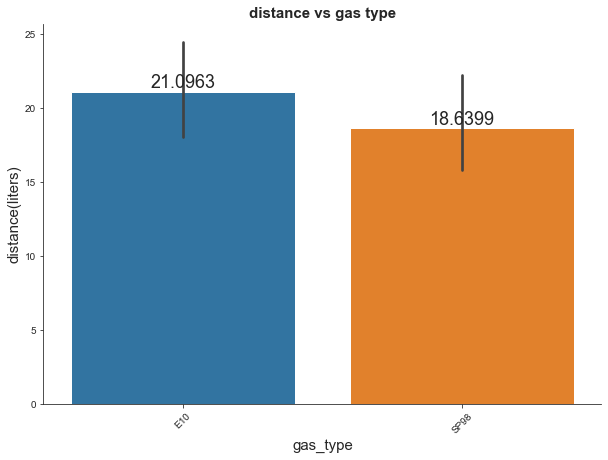

In [91]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='gas_type', y='distance',data=data1)
plt.title('distance vs gas type',fontsize=15, fontweight="bold")
plt.xlabel('gas_type', fontsize=15)
plt.ylabel("distance(liters)", fontsize=15)
sns.despine()

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xticks(rotation=45)
#sns.set_style("ticks")
#plt.legend(prop={'size': 18}, loc=2) # legend position

# code for label values. 
for container in ax.containers: 
    ax.bar_label(container,fontsize=18)
plt.show();

there is a bit of imbalance here so the best is to plot consumption per liter to normalize 

given the mixed nature of data ( dummified categoricals and the continuou variables) and the nature of the problem, i have decided to used randomforest classifier 

In [92]:
X=data1.drop('gas_type', axis=1)

In [93]:
y=data1['gas_type']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)

X_train = pd.DataFrame(X_train) # columns=X.columns
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

In [95]:

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_test))

The Accuracy for the Random Forest in the TRAIN set is 0.68
The Accuracy for the Random Forest in the TEST  set is 0.66


SP98    41
E10     18
Name: gas_type, dtype: int64

array([[ 4, 14],
       [ 6, 35]], dtype=int64)

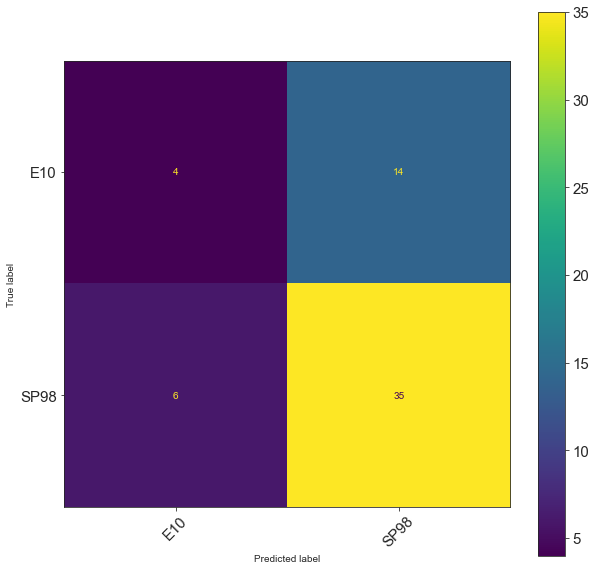

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, xticks_rotation=45)
plt.show()

In [97]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [98]:
model_performance_class(y_train, y_pred_train, y_test, y_pred_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.30
              precision    recall  f1-score   support

         E10       0.77      0.36      0.49       142
        SP98       0.65      0.92      0.76       187

    accuracy                           0.68       329
   macro avg       0.71      0.64      0.63       329
weighted avg       0.71      0.68      0.65       329

Results obtained for the TEST SET
The Cohen's Kappa is: 0.09
              precision    recall  f1-score   support

         E10       0.40      0.22      0.29        18
        SP98       0.71      0.85      0.78        41

    accuracy                           0.66        59
   macro avg       0.56      0.54      0.53        59
weighted avg       0.62      0.66      0.63        59



The classification model can be fine tuned to reflect get better results on precision. 
the time of the year difference impacts the prediction especially at the end of one season and the start of another. 
the data also does not reflect any changes in terrain or confirm to otherwise

also there is a class imbalance that impact the model performance as seen in the plot below. 
once addressed, model performance will improve. 
Given time, class balance address and xgb model with hyperparameters fine tuned would be used. 

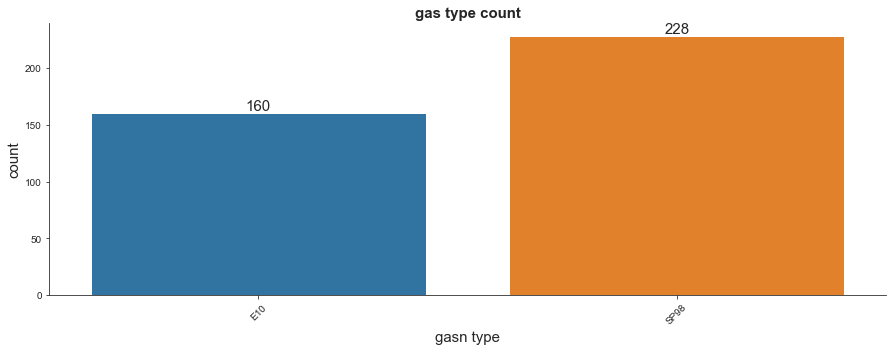

In [107]:
plt.figure(figsize = (15,5))
ax=sns.countplot(x='gas_type',data=data1)
plt.title("gas type count",fontsize=15, fontweight="bold")
plt.xlabel('gasn type', fontsize=15)
plt.ylabel("count", fontsize=15)
sns.despine()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.set_style("ticks")
plt.xticks(rotation=45)

for container in ax.containers: 
    ax.bar_label(container,fontsize=15);

The END